Ссылка на презентацию:https://cloud.mail.ru/public/CMdz/fAA5LCUxZ

Ссылка на дашборд: https://public.tableau.com/app/profile/sergey.bykov4376/viz/FinalprojectBanrchurn/Dashboard1?publish=yes

<h2>Анализ оттока клиентов банка "Метанпром"<a class="tocSkip">

<h3>Описание проекта:<a class="tocSkip"> </h3>
    
В проекте нужно проанализировать отток клиентов в региональном банке «Метанпром», расположенном в Ярославле и областных городах - Ростов Великий и Рыбинск. Заказчик проекта  - отдел маркетинга банка.

<h3>Цель исследования:<a class="tocSkip"> </h3>
    
Выяснить причину оттока клиентов банка и предоставить рекомендации для отдела маркетинга по удержанию клиентов.

<h3>Описание данных:<a class="tocSkip"> </h3>
    
В нашем распоряжении датасет: bank_scrooge.csv, содержащий информацию о клиентах банка «Метанпром». Данные содержат следующую информацию:
+ USERID — идентификатор пользователя;
+ score — баллы кредитного скоринга;
+ city — город;
+ gender — пол;
+ age — возраст;
+ equity — количество баллов собственности;
+ balance — баланс на счёте;
+ products — количество продуктов, которыми пользуется клиент;
+ credit_card — есть ли кредитная карта;
+ last_activity — активный клиент;
+ EST_SALARY — оценочный доход клиента;
+ сhurn — признак оттока.

План работы над проектом:</h3>
    
1.Обзор данных:</h4>
    
+ импорт необходимых библиотек;
+ загрузка данных;
+ предварительный просмотр данных. 
    
2.Предобработка данных:</h4>
    
+ проверка на корректность наименований колонок;
+ приведение к корректному типу данных;
+ проверка на наличие дубликатов (явных/неявных);
+ проверка на наличие пропусков;
+ проверка значений на наличие выбросов;
+ кодирование части данных;
+ категоризация части данных.
    
3.Исследовательский анализ данных:</h4>
    
+ изучение средних значений в данных;
+ визуализация и изучение распределения характеристик в разрезе оттока:
     + построение столбчатых диаграмм с уровнями оттока для категориальных характеристик;
     + построение гистограмм или kde-графиков для непрерывных характеристик;
     + построение тепловой карты для продуктов с долями пользующихся N продуктами в каждой из категорий.
+ корреляционный анализ отткока клиентов с другими параметрами;  
    
4.Статистический анализ данных:</h4>
    
+ Первая гипотеза:
    + Н0: Средний уровень дохода ушедших и оставшихся клиентов одинаков.
    + Н1: Средний уровень дохода ушедших и оставшихся клиентов разиличен.
    + вывод по результатам проверки первой гипотезы;
    
   
+ Вторая гипотеза:
    + Н0: Средний возраст ушедших и оставшихся клиентов одинаков.
    + Н1: Средний возраст ушедших и оставшихся клиентов различен.
    + вывод по результатам проверки второй гипотезы;    

5. Портрет уходящего клиента и сегментация:</h4>

+ составление портретов клиентов склонных к уходу;
+ сегментация и приоритизация сегментов.
   
    
5. Итоговые выводы;
6. Рекомендации по каждому из сегментов.</h4>
    

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)
sns.set_palette('muted')
sns.set_style('darkgrid')

In [3]:
try:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/datasets/bank_scrooge.csv')

In [4]:
# Функция получения первичной информации о датафрейме
def first_look (data):
    print('---------Первые 5 строк-----------')
    display(data.head(5))
    
    print('---------Последние 5 строк---------')
    display(data.tail(5))
    
    print('---------Типы данных---------------\n')
    display(data.info())
    
    print('---------Статистическая сводка---------------')
    display(data.describe())

In [5]:
first_look(df)

---------Первые 5 строк-----------


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


---------Последние 5 строк---------


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0


---------Типы данных---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

---------Статистическая сводка---------------


,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


### Предобработка данных

#### Проверка на корректность наименований колонок

In [6]:
# приведем названия столбцов к нижнему и "змеиному" регистрам:
df = df.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

#### Приведение к корректному типу данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Тип данных в столбцах соответствует их содержанию, поэтому оставим как есть.

#### Проверка на наличие дубликатов (явных/неявных); 

#####  Ищем явные дубликаты:

In [8]:
df.duplicated().sum()

0

Явных дубликатов нет.

#####  Проверим отдельно на наличие дубликатов столбец user_id, т.к. здесь все данные должны быть уникальными: 

In [9]:
df['user_id'].duplicated().sum()

73

Рассмотрим эти дубликаты:

In [10]:
df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Повидимому из-за сбоя в системе один и тот же идентификатор был присвоен разым людям, оставим эти строки.

#####  Проверим уникальные значения в столбцах:

In [11]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [12]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [13]:
df['age'].sort_values().unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 86., nan])

In [14]:
df['equity'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
df['products'].sort_values().unique()

array([0, 1, 2, 3, 4, 5])

In [16]:
df['credit_card'].unique()

array([0, 1])

In [17]:
df['last_activity'].unique()

array([1, 0])

In [18]:
df['churn'].unique()

array([1, 0])

Все уникальные значения корректны, кроме 0 в столбце products(продукты). \
Рассмотрим эти значения:

In [19]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Только один человек не имеет банковских продуктов, так же по нему нет активности, поэтому эту строку можно удалить.

In [20]:
df=df.drop(index=[8957])

#### Проверка на наличие пропусков 

In [21]:
print('---------Пропуски-----------')
df.isna().sum().sort_values(ascending=False)

---------Пропуски-----------


balance          2294
age                26
user_id             0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [22]:
print('-----Процент пропусков от всего датасета------')
round(df.isna().mean().sort_values(ascending=False)*100,2)

-----Процент пропусков от всего датасета------


balance          22.94
age               0.26
user_id           0.00
score             0.00
city              0.00
gender            0.00
equity            0.00
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

##### Удалим пропуски в столбце возраст (age) их всего 26:

In [23]:

df = df.dropna(subset=['age'])

##### Рассмотрим пропуски в баллансе (balance) - их много порядка 23%:

Посмотрим на гистограмму баланса:

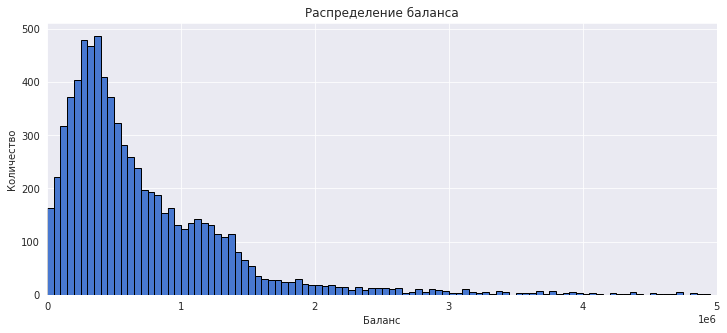

In [24]:
plt.figure(figsize=(12, 5))
df.balance.hist(range=[0,5000000], bins=100, edgecolor='black')
plt.title('Распределение баланса')
plt.xlabel('Баланс')
plt.ylabel('Количество')
plt.xlim(0, 5000000);

С помощью метода describe посмотрим две таблицы данные только по пропускам и данные без пропусков: 

In [25]:
print('---------------------------------------Данные только с пропусками в балансе------------------------------') 
display (df[df['balance'].isna()].agg(['mean', 'median']))

print('----------------------------------------Данные без пропусков в балансе----------------------------------')
display (df[df['balance'].notnull()].agg(['mean', 'median']))

---------------------------------------Данные только с пропусками в балансе------------------------------


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
mean,171915.451273,865.31475,42.076822,0.050044,NaN,1.16374,0.815628,0.549166,226433.776313,0.005268
median,172376.000000,903.00000,40.000000,0.000000,NaN,1.00000,1.000000,1.000000,174354.235000,0.000000


----------------------------------------Данные без пропусков в балансе----------------------------------


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
mean,171710.892268,843.74412,42.924366,3.394802,827245.587515,2.081222,0.640156,0.51514,124520.394264,0.234698
median,172710.000000,840.00000,40.000000,4.000000,524295.330000,2.000000,1.000000,1.00000,106250.180000,0.000000


Видим что пользователи у которых есть пропуски в балансе имеют:
+ более высокие баллы кредитного скоринга;
+ практически не имеют собственности;
+ используют меньшее число продуктов, в среднем 1;
+ больше пользуются кредитными картами;
+ имеют гораздо более высокие зарплаты, более чем 1.7 раз;
+ практичиски никто не уходит из банка.

Визуализируем распределение пропусков в балансе клиентов по характеристикам:

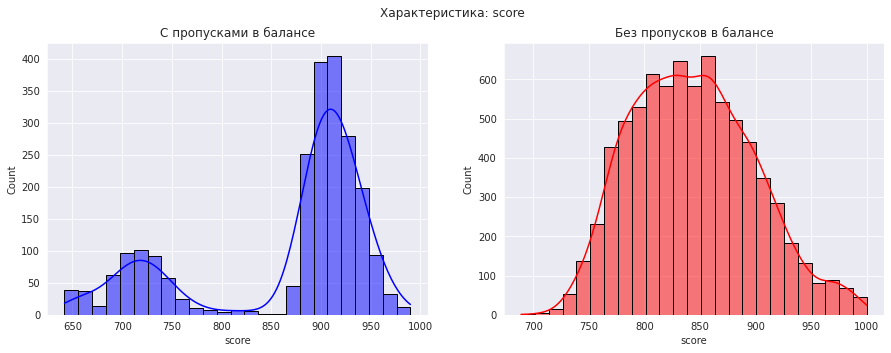

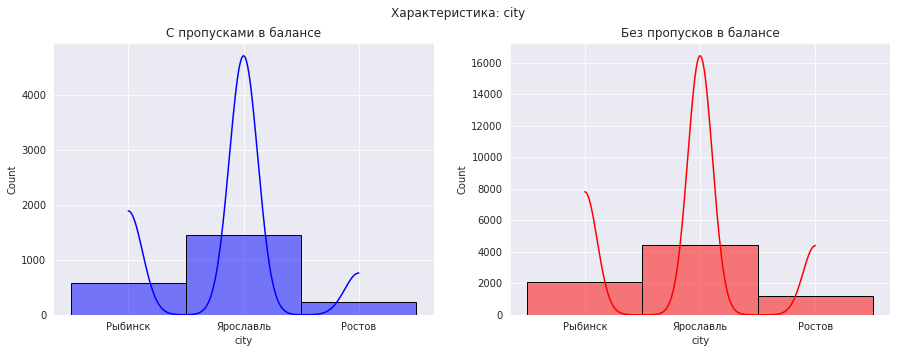

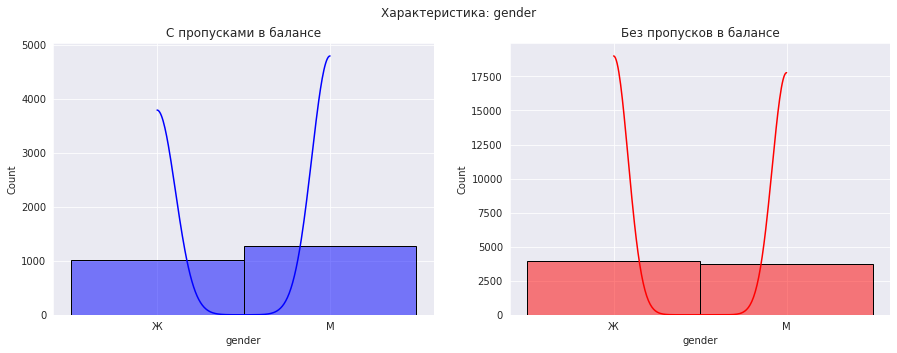

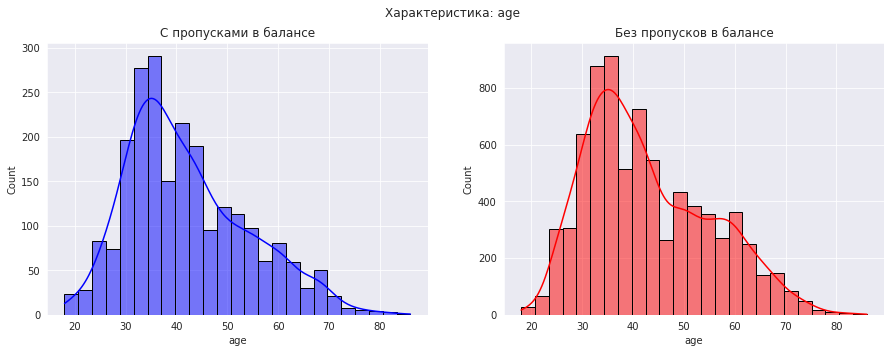

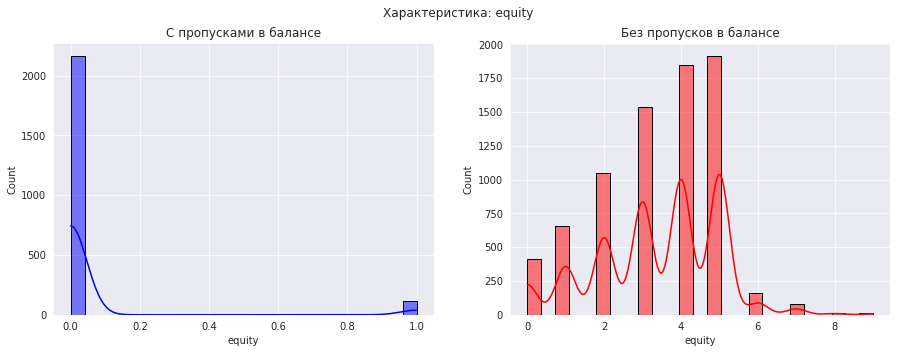

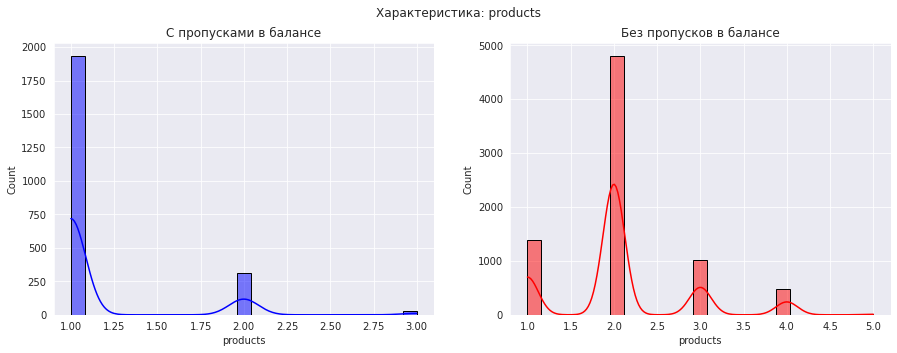

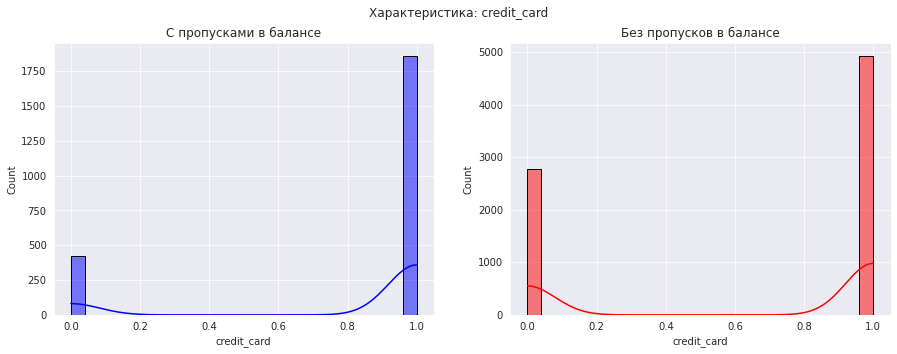

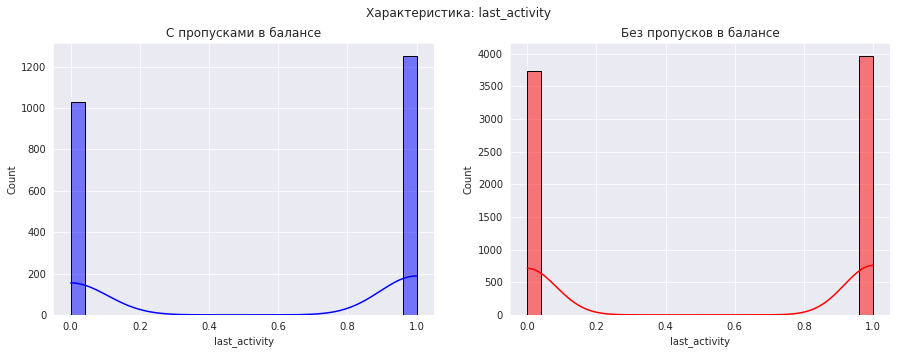

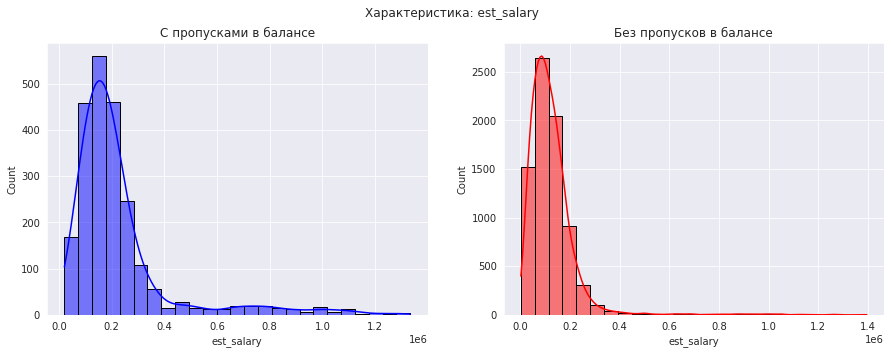

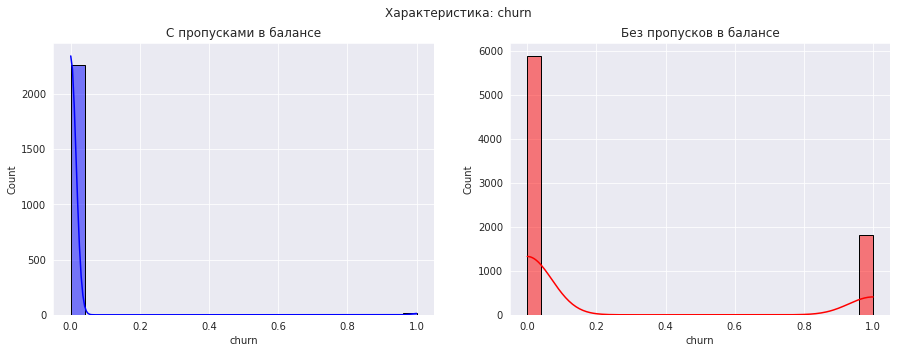

In [26]:
df_not_balance = df[df['balance'].isnull()]
df_balance = df[df['balance'].notnull()]


for column in df.columns.drop({'user_id', 'balance'}): 
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 2)
    sns.histplot(df_balance[column], bins=25, color='red', kde=True, edgecolor='black')
    plt.title('Без пропусков в балансе')

    plt.subplot(1, 2, 1)
    sns.histplot(df_not_balance[column], bins=25, color='blue', kde=True, edgecolor='black')
    plt.title('С пропусками в балансе')

    plt.suptitle('Характеристика: ' + column)
    plt.show()

Визуальный анализ указывает на различия распределений только по столбцам:score, equity и products.


Клиенты банка с пропусками в балансе:
+ имеют малое количество значений в распределении  баллов кредитного скоринга, но большее количество в малых и высоких значениях по сравнению с клиентами без пропусков;
+ в большинстве не имеют недвижимости (порядка 2250 клиентов) или имеют только один объект(менее 100 клиентов);
+ пользуются одним продуктам банка (около 2000 клиентов) или пользуются 2-3 проуктами(менее 300 клиентов).

Посмотрим относительное распредление пропущенных значений:

In [27]:
df_missing = df[df['balance'].isna()]

for column in ['city', 'equity', 'products','credit_card','last_activity', 'churn']:
    print(column)
    print(round(df_missing[column].value_counts(normalize=True),2))
    print()    

city
Ярославль    0.64
Рыбинск      0.26
Ростов       0.10
Name: city, dtype: float64

equity
0    0.95
1    0.05
Name: equity, dtype: float64

products
1    0.85
2    0.14
3    0.01
Name: products, dtype: float64

credit_card
1    0.82
0    0.18
Name: credit_card, dtype: float64

last_activity
1    0.55
0    0.45
Name: last_activity, dtype: float64

churn
0    0.99
1    0.01
Name: churn, dtype: float64



Видим, что у 82% клиентов с пропусками в балансе есть кредитная карта. Так же  99% из них действующие клиенты банка и 85% этих пользователей имеют 1 продукт.

In [28]:
# посмотрим у какого количества пользвателей нулевой баланс или меньше:
df[df['balance'] <= 0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


На основании проведенного анализа можно предположить, что большинство клиентов с пропусками в балансе являются держатели кредитных карт банка их порядка 2000 человек и баланс этих кредитных карт отрицательный, поэтому стоят пропуски. Либо пропуски в балансе это ошибка выгрузки. Сами мы выяснить причину пропусков  не можем, лучше обратиться к коллегам и  уточнить информацию у них. Поэтому пока оставим пропуски в данных без изменений, не будем их заполянть, чтобы не исказить расчеты.

##### Проверка значений на наличие выбросов

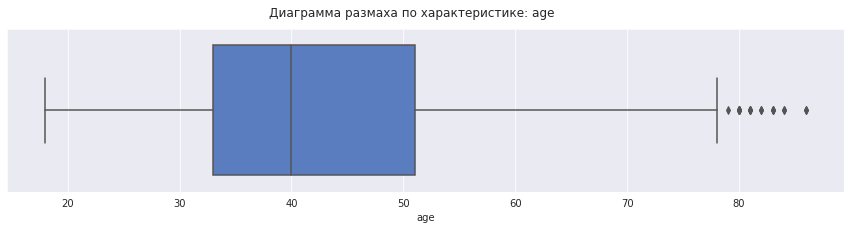

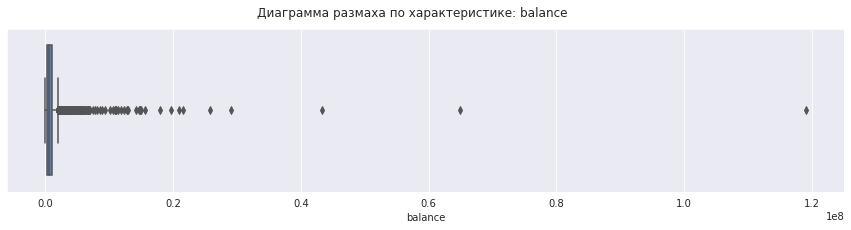

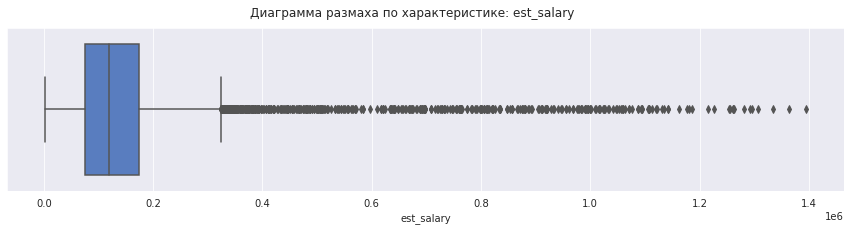

In [29]:
for column in ['age', 'balance', 'est_salary']:
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=column, data=df)
    plt.suptitle('Диаграмма размаха по характеристике: ' + column)
    plt.show();

Выбросов достаточно много, поэтому чтобы сохранить большее количество данных определим выбросы по balance и est_salary в отдельные группы и исследуем их.
По возрасту определим границу выбросов в 80 лет.

In [30]:
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9973.000000,9973.000000,9973.000000,9973.000000,7.695000e+03,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000
mean,171757.616966,848.671212,42.730773,2.630803,8.272456e+05,1.871653,0.680237,0.522912,1.477991e+05,0.182292
std,33696.365256,65.393153,12.175166,1.980060,1.980327e+06,0.792547,0.466408,0.499500,1.392871e+05,0.386105
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142757.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196431e+05,0.000000
75%,201164.000000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.745000e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Найдем границы выбросов для balance и est_salary

In [31]:
for column in ['age', 'balance', 'est_salary']:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    print(f'Граница выбросов для {column}: ', round(upper_bound))

Граница выбросов для age:  78
Граница выбросов для balance:  2006580
Граница выбросов для est_salary:  323372


In [32]:
print('Количество клиентов старше 78 лет:', len(df.query('age > 78')))
print('Процент от общего числа:', round(len(df.query('age > 80'))/len(df)*100, 2))

Количество клиентов старше 78 лет: 21
Процент от общего числа: 0.13


In [33]:
print('Количество клиентов с зарплатой больше 323 372 рубля:', len(df.query('est_salary > 323372')))
print('Процент от| общего числа:', round(len(df.query('est_salary > 333372'))/len(df)*100, 2))

Количество клиентов с зарплатой больше 323 372 рубля: 479
Процент от| общего числа: 4.47


In [34]:
print('Количество клиентов с балансом свыше 2 006 580 рублей:', len(df.query('balance > 2006580')))
print('Процент от общего числа:', round(len(df.query('balance > 2006580'))/len(df)*100, 2))

Количество клиентов с балансом свыше 2 006 580 рублей: 427
Процент от общего числа: 4.28


Пропуски удалять не будем, тк выбросы по балансу и зарплате это ВИП-Клиенты, создадим для них отдельную категорию. Выбросы по возрасту тоже оствим, они будут в самой высокой категории по возрасту (63+).

Но создадим датафрейм без выбросов df_filtered, он пригодится для дальнейшей работы.

In [35]:
# Фильтрация данных для удаления выбросов, сохраняя пропущенные значения
df_filtered = df[((df['age'] <= 78) | df['age'].isna()) &
                 ((df['balance'] <= 2006580) | df['balance'].isna()) &
                 ((df['est_salary'] <= 323372) | df['est_salary'].isna())]

# Проверка размера датафрейма до и после удаления выбросов
print("Размер датафрейма до удаления выбросов:", df.shape)
print("Размер датафрейма после удаления выбросов:", df_filtered.shape)
print ("Доля выбросов в датафреймe: ", round(((1 - len(df_filtered) / len(df))*100), 2))  

Размер датафрейма до удаления выбросов: (9973, 12)
Размер датафрейма после удаления выбросов: (9165, 12)
Доля выбросов в датафреймe:  8.1


#### Кодирование части данных

Для анализа нам нужно кодировать(перевести категориальные данные в бинарные) некоторые столбцы balance и est_salary:

In [36]:
# создадем копии столбцов city и gender:
df['city_1'] = df['city']
df['gender_1'] = df['gender']

df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_1,gender_1
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,Рыбинск,Ж
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,Рыбинск,Ж
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,Рыбинск,Ж
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,Ярославль,Ж
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,Ярославль,М


In [37]:
# кодируем данные в столбцах city_1 и gender_1:
df = pd.get_dummies(df, columns = ['city_1', 'gender_1'])
df = df.rename (
                columns = ({'city_1_Ростов':'Ростов', 
                            'city_1_Рыбинск':'Рыбинск',
                            'city_1_Ярославль':'Ярославль', 
                            'gender_1_Ж':'female', 
                            'gender_1_М':'male'})
)

display (df.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


#### Категоризация части данных

##### Проведем категоризацию клиентов по возрасту. 

Text(0.5, 1.0, 'Распределение отточных клиентов по возрасту')

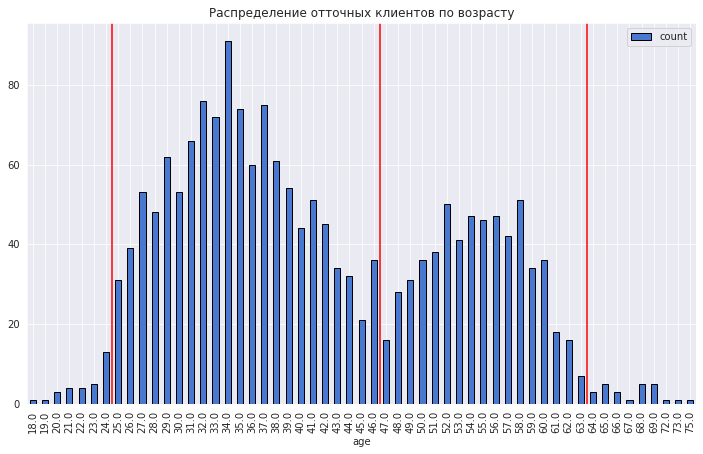

In [38]:
# построим распределение отточных клиентов по возрасту:
df[df['churn']==1]['age'].value_counts() \
                         .reset_index() \
                         .rename(columns={'index':'age', 'age':'count'}) \
                         .sort_values(by='age') \
                         .plot(kind='bar', figsize = (12,7), x = 'age', y = 'count', edgecolor='black')


plt.axvline(x=6.5, color='red')
plt.axvline(x=28.5, color='red')
plt.axvline(x=45.5, color='red')

plt.title('Распределение отточных клиентов по возрасту')

Создадим функцию и поделим возвраст на категории:

In [39]:
def age_category(age):
    if age <= 24:
        return '18-24'
    if 25 <= age <= 46:
        return '25-46'
    if 47 <= age <= 62:
        return '47-62'
    else:
        return '63+'  

df['age_category'] = df['age'].apply(age_category)

df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,female,male,age_category
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,25-46
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,25-46
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,25-46
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,47-62
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,25-46


In [40]:
# создадем копию столбца age_category:
df['category_age']=df['age_category']

# кодируем данные в столбце age_category:
df = pd.get_dummies(df, columns=['age_category'])

df= df.rename(columns=({
    'age_category_18-24':'18_24',
    'age_category_25-46':'25_46',
    'age_category_47-62':'47_62',
    'age_category_63+':'63_+'})
)
              
df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,Ростов,Рыбинск,Ярославль,female,male,category_age,18_24,25_46,47_62,63_+
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,...,0,1,0,1,0,25-46,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,...,0,1,0,1,0,25-46,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,...,0,1,0,1,0,25-46,0,1,0,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,...,0,0,1,1,0,47-62,0,0,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,...,0,0,1,0,1,25-46,0,1,0,0


##### Проведем категоризацию клиентов по балансу и зарплате.

In [41]:
# Создание нового столбца и заполнение его значениями на основе условий
df['vip_balance'] = df['balance'] > 2006580
df['vip_salary'] = df['est_salary'] > 323372
df['vip'] = (df['balance'] > 2006580) | (df['est_salary'] > 323372)

df[['vip_balance', 'vip_salary', 'vip']] = df[['vip_balance', 'vip_salary', 'vip']].astype(int)

df.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,female,male,category_age,18_24,25_46,47_62,63_+,vip_balance,vip_salary,vip
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,...,1,0,25-46,0,1,0,0,0,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,...,1,0,25-46,0,1,0,0,0,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,...,1,0,25-46,0,1,0,0,0,0,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,...,0,1,25-46,0,1,0,0,0,0,0


#### <b>Вывод по разделу</b>

Были выполнены работы по предобработке данных:

+ Колонки приведены в нужный тип данных;
+ Проверены уникальные значения в столбцах;
+ Проведена проверка на наличие дубликатов и пропусков;
+ Проведена работу по поиску выбросов;
+ Проведено кодирование данных по полу и городу клиентов;
+ Проведена категоризация данных клиентов по возрасту, зарплате и балансу.

### Исследовательский анализ данных:

#### Изучим средние значения характеристик в разрезе оттока:

In [42]:
df.drop('user_id', axis=1).groupby(by='churn').mean().round(2).T

churn,0,1
score,845.40,863.36
age,43.02,41.43
equity,2.38,3.76
balance,733031.63,1134458.21
products,1.76,2.38
credit_card,0.71,0.55
last_activity,0.48,0.70
est_salary,147674.64,148357.48
Ростов,0.14,0.15
Рыбинск,0.28,0.24


По средним данным отточных и неотточных клиентов видим следующее:

+ баллы скорингового рейтинка практически не различаются;


+ средний возраст отточных клиентов немного ниже;


+ ! баланс отточных клиентов выше более чем  1.5 раза;


+ ! отточные клиенты используют в среднем 2-3 продукты, тогда как неоотточные 1-2 продукта юанка;


+ ! 55% отточных клиентов пользуется кредными картами, у неоотточных клиентов 71%;


+ ! активность отточных клиентов почему то выше - 70% против 48% у неотточных;


+ уровень зарплат одинаков;


+ ! в разрезе городов пропорциональный уровень оттока практически одинаков;


+ ! среди отточных клиентов мужского пола почти в 2 раза больше 65% против 35% у женщин;


+ ! клиенты возрастной категории 47-62 года более склонны к уходу (32%) , тогда как клиенты старше 63 лет и моложе 24 наоборот не склонны уходить. По пропорцииональности возраста группа 25-46 лет у отточных и неооточных клиентов одинакова.


+ ! клиенты категории vip_balance уходят гораздо чаще! Клиенты же из группы с высокой зарплатой (vip_salary) не склонны к уходу(скорей наооборот присутствует небольшая обратная корреляция).

#### Визуализируем значения характеристик в разрезе отточных и оставшихся клиентов, так же проведем расчеты:

#####  Визуализация - категориальные переменные:

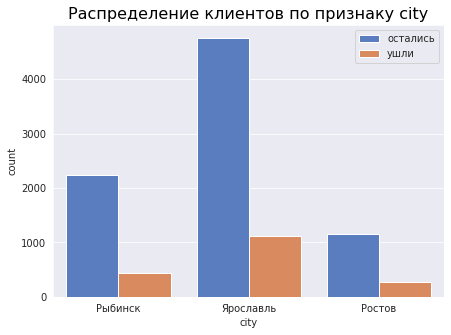

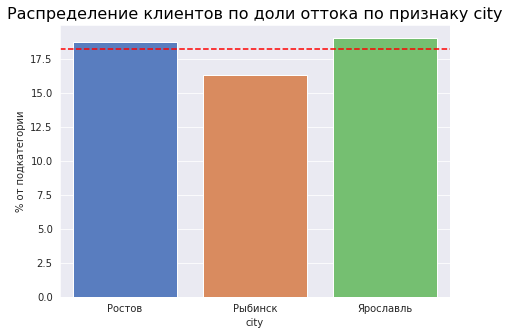

,city,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,Ростов,1416,265,1151,18.71,1818,14.58
1,Рыбинск,2682,436,2246,16.26,1818,23.98
2,Ярославль,5875,1117,4758,19.01,1818,61.44


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


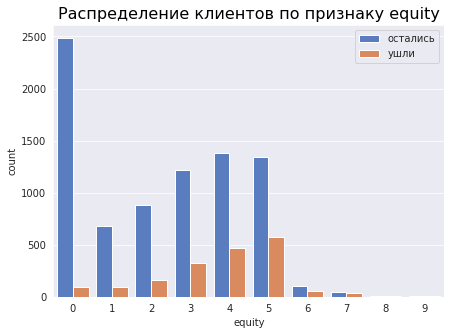

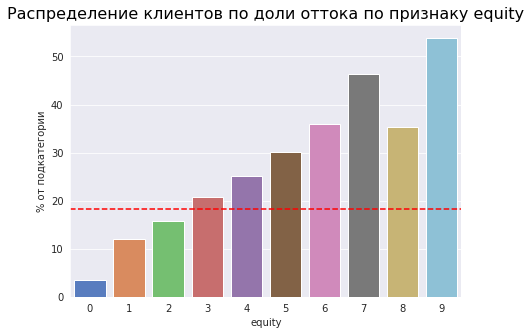

,equity,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,2576,89,2487,3.49,1817,4.90
1,1,773,93,680,12.03,1817,5.12
2,2,1051,166,885,15.79,1817,9.14
3,3,1540,321,1219,20.84,1817,17.67
4,4,1847,464,1383,25.12,1817,25.54
5,5,1915,576,1339,30.08,1817,31.70
6,6,161,58,103,36.02,1817,3.19
7,7,80,37,43,46.25,1817,2.04
8,8,17,6,11,35.29,1817,0.33
9,9,13,7,6,53.85,1817,0.39


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


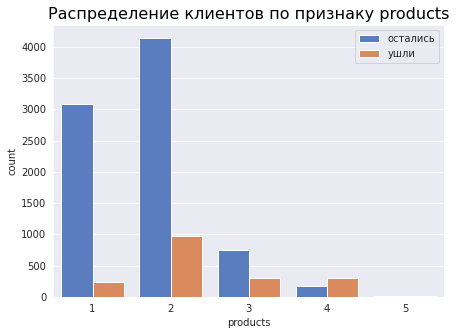

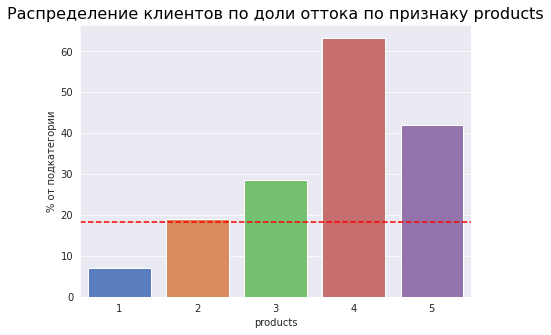

,products,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,1,3323,235,3088,7.07,1818,12.93
1,2,5119,978,4141,19.11,1818,53.80
2,3,1038,297,741,28.61,1818,16.34
3,4,474,300,174,63.29,1818,16.50
4,5,19,8,11,42.11,1818,0.44


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


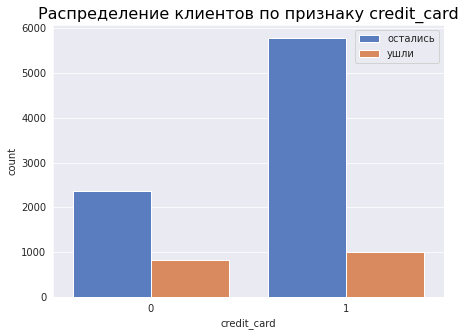

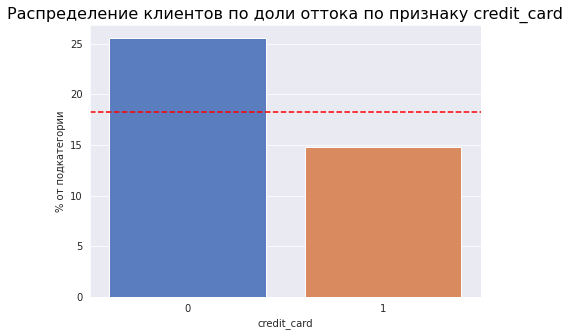

,credit_card,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,3189,815,2374,25.56,1818,44.83
1,1,6784,1003,5781,14.78,1818,55.17


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


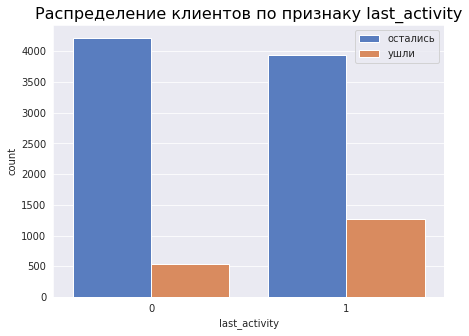

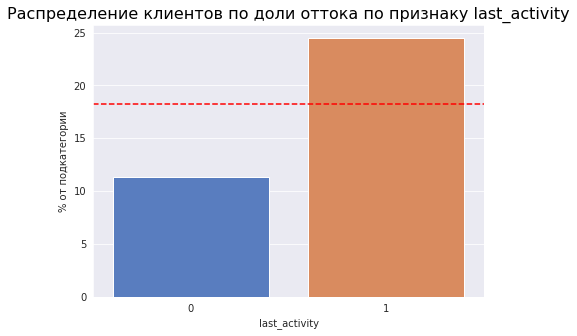

,last_activity,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,4758,541,4217,11.37,1818,29.76
1,1,5215,1277,3938,24.49,1818,70.24


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


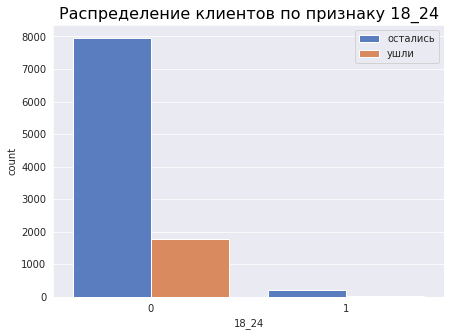

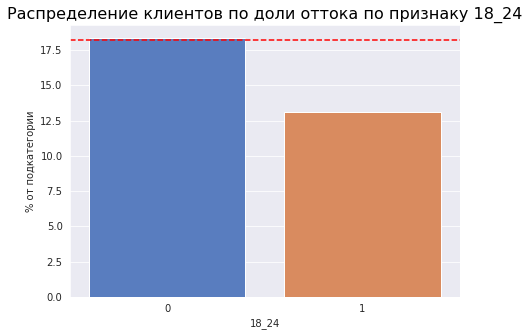

,18_24,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,9737,1787,7950,18.35,1818,98.29
1,1,236,31,205,13.14,1818,1.71


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


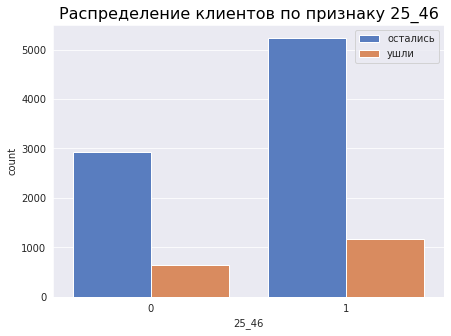

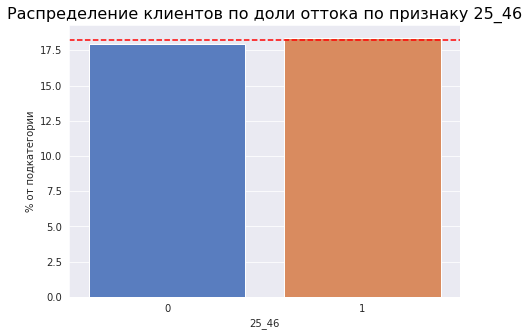

,25_46,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,3562,640,2922,17.97,1818,35.2
1,1,6411,1178,5233,18.37,1818,64.8


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


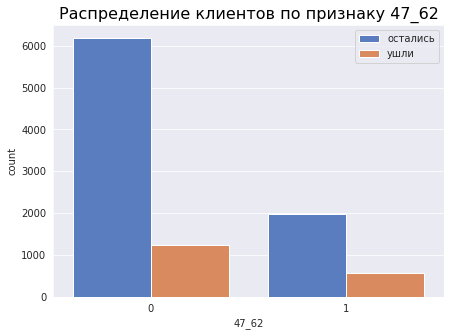

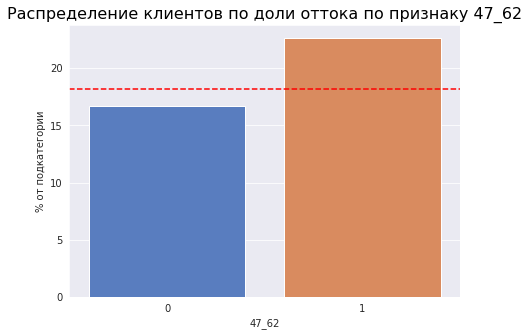

,47_62,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,7426,1241,6185,16.71,1818,68.26
1,1,2547,577,1970,22.65,1818,31.74


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


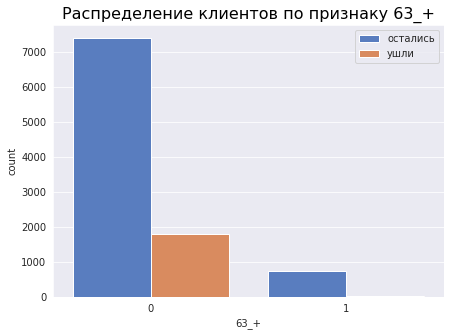

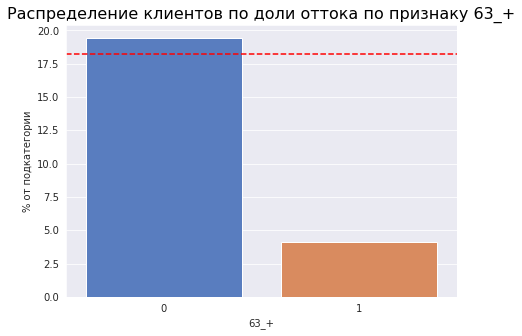

,63_+,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,9194,1786,7408,19.43,1817,98.29
1,1,779,31,748,4.11,1817,1.71


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


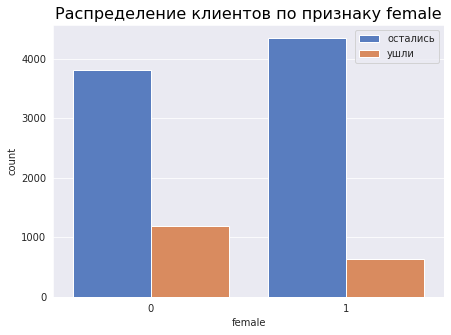

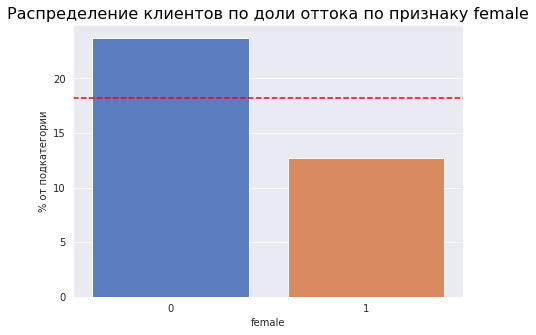

,female,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,4991,1183,3808,23.70,1817,65.11
1,1,4982,634,4348,12.75,1817,34.89


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


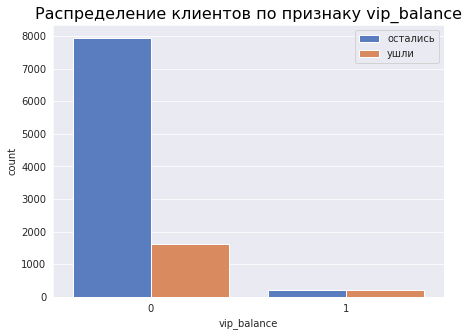

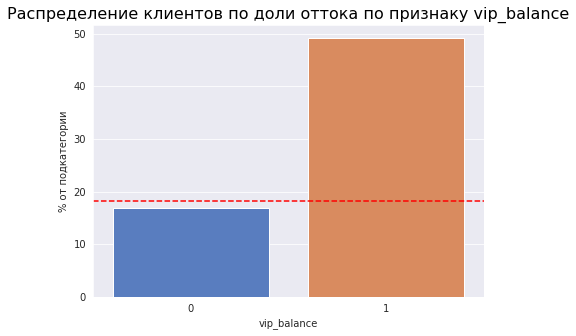

,vip_balance,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,9546,1608,7938,16.84,1818,88.45
1,1,427,210,217,49.18,1818,11.55


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


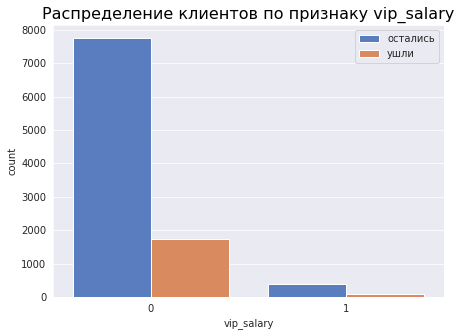

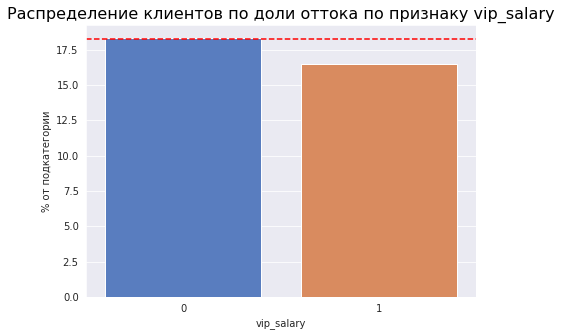

,vip_salary,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,9494,1739,7755,18.32,1818,95.65
1,1,479,79,400,16.49,1818,4.35


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


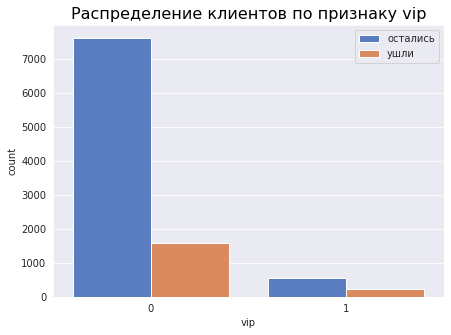

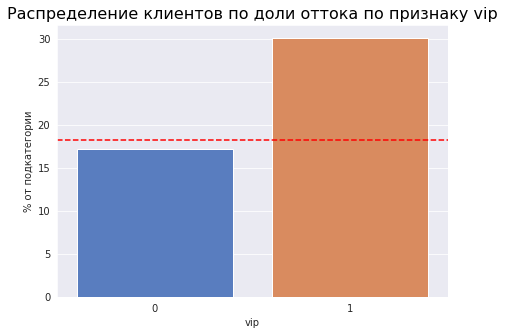

,vip,count,ушли,остались,% от подкатегории,всего ушло,% от категории
0,0,9185,1580,7605,17.21,1817,86.96
1,1,788,237,551,30.08,1817,13.04


 Средний отток по банку:


,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


In [43]:
categorical_columns = ['city', 'equity', 'products', 'credit_card', 'last_activity',  \
                        '18_24', '25_46', '47_62', '63_+', 'female', 'vip_balance', 'vip_salary', 'vip']

for column in categorical_columns:
    #сводная таблица
    df_info = df.groupby(column)['churn'].agg(['count', 'mean']).reset_index()
    df_info['ушли'] = (df_info['count'] * df_info['mean']).astype(int)
    df_info['остались'] = df_info['count'] - df_info['ушли']
    df_info['% от подкатегории'] = (df_info['mean'] * 100).round(2)
    df_info['всего ушло'] = sum(df_info['ушли'])
    df_info['ушли без подкат'] = sum(df_info['ушли']) - df_info['ушли']
    df_info['% от категории'] = (df_info['ушли'] / sum(df_info['ушли']) * 100).round(2)
    df_info = df_info.drop(columns=['mean', 'ушли без подкат'])    
    
    #график по  оттоку внутри подкатегории
    plt.figure(figsize=(7,5))
    ax = sns.countplot(data=df, x=column, hue='churn')
    plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
    #plt.legend({'ушли', 'остались'}, loc='right', bbox_to_anchor=(1, 0.93))
    plt.legend(labels = ['остались', 'ушли'])
    plt.show()
    
    #график по долям оттока вцелом по категории(df)
    plt.figure(figsize=(7,5))
    ax = sns.barplot(x=column, y='% от подкатегории', data=df_info)
    plt.axhline(18.23, color='red', linestyle='--')
    plt.title(f'Распределение клиентов по доли оттока по признаку {column}', fontsize = 16, color = 'black')
    plt.show()
    
    display(df_info)  
       
    #средний отток по банку 
    df_info = df.groupby('churn')[column].agg(['count']).reset_index()
    df_info['% по банку'] = (df_info['count'] / sum(df_info['count']) * 100).round(2)
    print(' Средний отток по банку:')
    display(df_info)
    
    

    

<b>Вывод:</b>

По характеристикам категориальных переменных в разрезе оттока видим следущее:

+ всего отточных клиентов 1818 это 18.23% от общего количества 9973;


+ ! из выделеннных нами возрастных категорий клиенты в возрасте 47-62 года уходят чаще, чем в среднем по банку - 22% оттока, у остальных категорий отток ниже средне банковского. Ниже исследуем график по возрасту, как по непрерывной переменной, возможно внесем в итоговый вывод корректировки;


+ ! Уровень оттока клиентов, у которых в собственности 3 объекта и больше превышает средне банковский. Чем больше объектов собственности тем больший уровень оттока от 3.5 до 54%, на этот признак стоит особенно обратить внимание при построении портретов отточных клиентов;


+ ! Уровень оттока у клиентов использующих 2 и более продуктов превышает средне банковский, самый высокий отток у клиентов пользующихся 4 и 5 продуктами - 63 и 42% соответственно. В целом при росте количества используемых продуктов банка растет и отток от 7 до 63%, так же выделим и эту характеристику;


+ ! клиенты у которых нет кредитной карты уходят чаще почти в 2 раза 25% (превышает отток по банку 18.23%!!!) и 14% соответственно;


+ ! Уровень оттока у активных клиентов выше чем средний по банку 24.5%. Активные клиенты уходят чаще 24% против 11% у неактивных. 

+ !! процент отточности не зависит от города, обратим и на этот факт внимание! Хотя уровень оттока в Ярославле и Ростове совсем немного(на доли %) превышает средне банковский, а вот в Рыбинске наоборот отток меньше 16% - наверное там много отделений).


+ ! Видим что % оттока у мужчин выше среднебанковского и составляет 23%, тогда как у женщин же наоборот ниже - 12%. Наверное это психологический фактор, женщины больше любят стабильность. 

+ наблюдается большая отточность по категории vip_balance - 49% - гораздо выше чем в среднем по банку, можно сразу выделить эту группу в отдельный сегмент!

##### Визуализация - непрерывные переменные переменные:

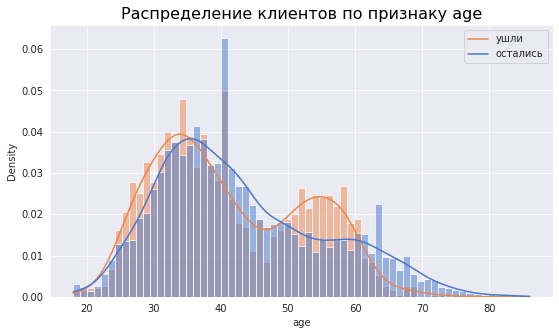

,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


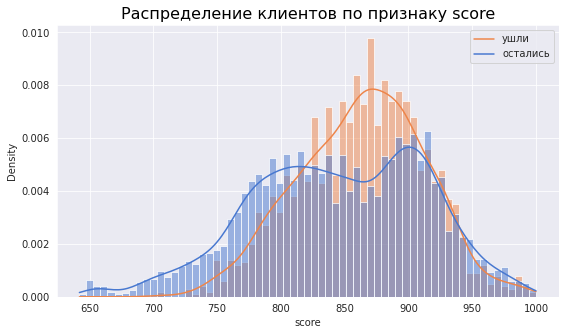

,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


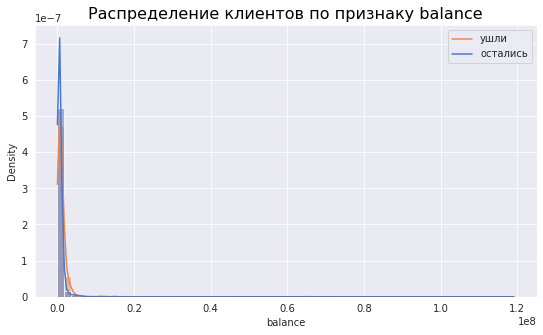

,churn,count,% по банку
0,0,5889,76.53
1,1,1806,23.47


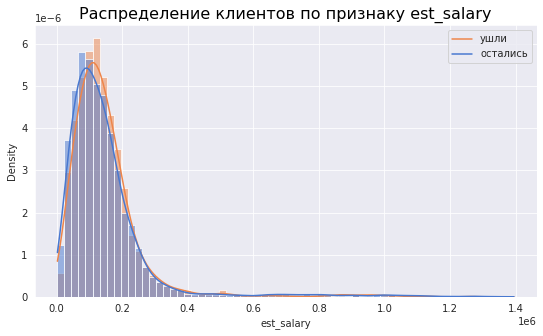

,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


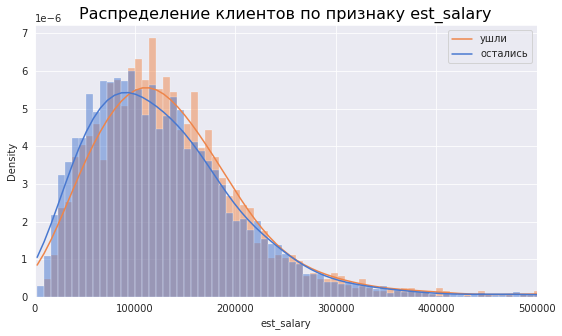

,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


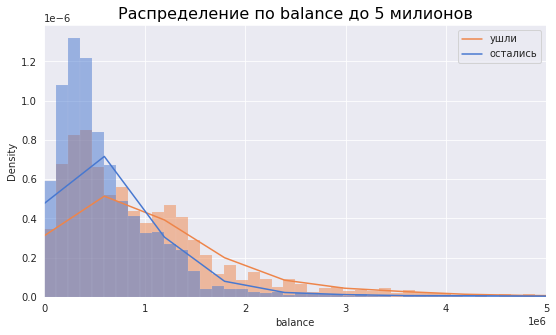

,churn,count,% по банку
0,0,8155,81.77
1,1,1818,18.23


In [44]:
for column in ['age', 'score', 'balance', 'est_salary']:
    #составляем сводную таблицу
    df_info = df.groupby('churn')[column].agg(['count']).reset_index()
    df_info['% по банку'] = (df_info['count'] / sum(df_info['count']) * 100).round(2)
   
    plt.figure(figsize=(9,5))
    sns.histplot(data=df, x=column, hue='churn', bins=65, kde=True, stat='density', common_norm=False, legend=False);
    plt.title(f'Распределение клиентов по признаку {column}', fontsize = 16, color = 'black')
    #plt.legend({'ушли', 'остались'}, loc='right', bbox_to_anchor=(1, 0.93))
    plt.legend(labels = ['ушли', 'остались'])
    plt.show()
    display(df_info)           


plt.figure(figsize=(9,5))
sns.histplot(data=df, x='est_salary', hue='churn', bins=200, kde=True, stat='density', common_norm=False, legend=False);
plt.title(f'Распределение клиентов по признаку est_salary', fontsize = 16, color = 'black')
plt.xlim(0, 500000)
#plt.legend({'ушли', 'остались'}, loc='right', bbox_to_anchor=(1, 0.93))
plt.legend(labels = ['ушли', 'остались'])
plt.show()
display(df_info)

plt.figure(figsize=(9,5))    
sns.histplot(data=df, x='balance', hue='churn', bins=1000, kde=True, stat='density', common_norm=False, legend=False);
plt.title(f'Распределение по balance до 5 милионов', fontsize = 16, color = 'black')
plt.xlim(0, 5000000)
#plt.legend({'ушли', 'остались'}, loc='right', bbox_to_anchor=(1, 0.93))
plt.legend(labels = ['ушли', 'остались'])
plt.show()
display(df_info)              

<b>Вывод:</b>

По характеристикам непрерывных переменных в разрезе оттока видим следущее:

+ средний отток по банку - 18.23%;


+ доля отточных клиентов в возрастных группах 25-35 лет и 50-60 лет превышает долю неотточных, что конечно превышает средний отток по банку;


+ количество отточных клиентов с баллами кредитного скоринга 825-920 превышает количество клиентов которые остаются. Значимый уровень оттока начинается примерно с 750 баллов кредитного скоринга;


+  Клиенты с балансом более 660 000 рублей, уходят чаще чем остаются;


+  более половниы клиентов с зарплатой 100 000 - 220 000 рублей уходят.

#### Проведем корреляционный анализ отткока клиентов с другими параметрами:

Значимые характеристики:
 churn            1.00
products         0.30
equity           0.27
last_activity    0.17
vip_balance      0.17
male             0.14
score            0.11
63_+            -0.11
credit_card     -0.13
female          -0.14
Name: churn, dtype: float64


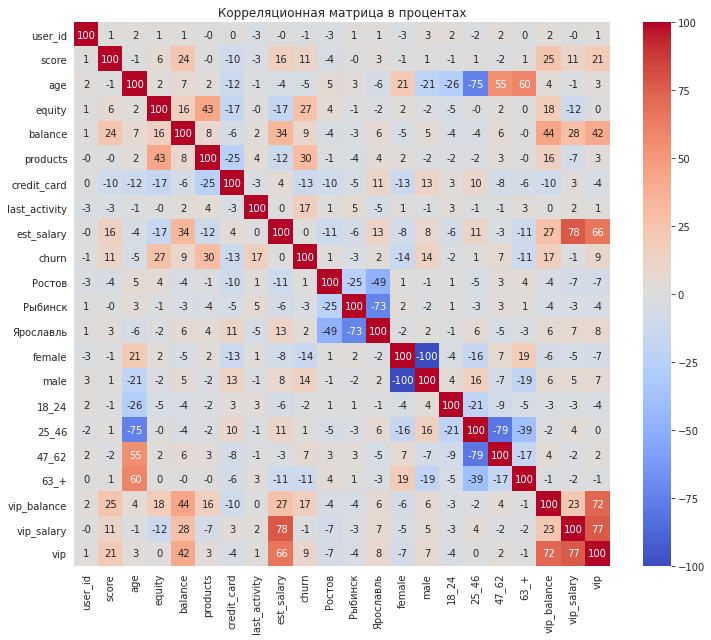


Описание корреляций с помощью шкалы Чеддока:
 user_id           Очень слабая
score             Очень слабая
age               Очень слабая
equity                  Слабая
balance           Очень слабая
products                Слабая
credit_card       Очень слабая
last_activity     Очень слабая
est_salary        Очень слабая
churn            Очень сильная
Ростов            Очень слабая
Рыбинск           Очень слабая
Ярославль         Очень слабая
female            Очень слабая
male              Очень слабая
18_24             Очень слабая
25_46             Очень слабая
47_62             Очень слабая
63_+              Очень слабая
vip_balance       Очень слабая
vip_salary        Очень слабая
vip               Очень слабая
Name: churn, dtype: object


In [45]:
# Анализ зависимостей между характеристиками и целевой переменной
correlation = df.corr()

# Найдем характеристики, которые коррелируют с целевой переменной более чем на 10%
significant_features = correlation[abs(correlation['churn']) > 0.10]['churn'].round(2).sort_values(ascending=False)
print('Значимые характеристики:\n', significant_features)

# Подготовим корреляционную матрицу для визуализации
correlation_percent = correlation.applymap(lambda x: round(x*100, 0))

# Визуализируем корреляционную матрицу
plt.figure(figsize=(12,10))
sns.heatmap(correlation_percent, annot=True, cmap='coolwarm', center=0, fmt='g')
plt.title('Корреляционная матрица в процентах')
plt.show()

# Описание корреляций с помощью шкалы Чеддока
def chedhok_scale(val):
    val = abs(val)
    if val == 0:
        return 'Корреляции нет'
    elif val < 0.2:
        return 'Очень слабая'
    elif val < 0.4:
        return 'Слабая'
    elif val < 0.6:
        return 'Умеренная'
    elif val < 0.8:
        return 'Сильная'
    else:
        return 'Очень сильная'

correlation_description = correlation['churn'].apply(chedhok_scale)
print("\nОписание корреляций с помощью шкалы Чеддока:\n", correlation_description)

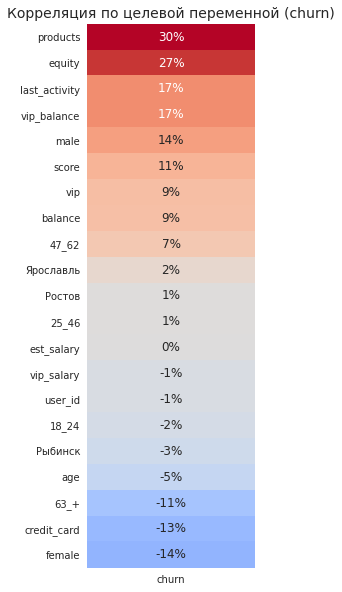

In [46]:
# Подготовим корреляционную матрицу только для целевой переменной
target_correlation = correlation[['churn']].drop(['churn'])

# Сортировка по величине корреляции
sorted_target_correlation = target_correlation.sort_values(by='churn', ascending=False)

# Визуализируем отсортированную корреляционную матрицу
plt.figure(figsize=(3, 10))
sns.heatmap(sorted_target_correlation, annot=True, cmap='coolwarm', center=0, fmt='.0%', cbar=False, annot_kws={"size": 12})
plt.title('Корреляция по целевой переменной (churn)', fontsize=14)
plt.show()

<b>Вывод:</b> Портреты уходящих клиентов будем состовлять по следующим характеристикам:

+ 1. products — количество продуктов, которыми пользуется клиент (27% корреляция);


+ 2. equity — количество баллов собственности (25% корреляция);


+ 3. last_activity - активность (16% корреляция);


+ 4. credit_card - наличие кредитной карты (-11% обратная корреляция;)


+ 5. male —  мужской пол (13% корреляция);


+ 6. score - банковский скоринг (8% корреляция), возьмем диапазон от 800 до 900 баллов - он наиболее отточный;


+ 7. age - у чтем корреляцию по возрастным группам 25-46 и 47-62 года (от -10 до 6% корреляция).

### Статистический анализ данных:
     

#### <b>Первая гипотеза: о доходах клиентов

+ Н0: Средний уровень дохода ушедших и оставшихся клиентов одинаков.

+ Н1: Средний уровень дохода ушедших и оставшихся клиентов разиличен.

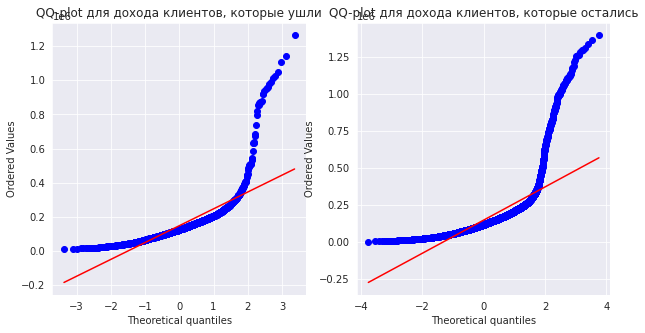

In [47]:
# Разделение данных
left = df[df['churn'] == 1]['est_salary']
stayed = df[df['churn'] == 0]['est_salary']

# Проверка на нормальность с помощью QQ-plot
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
st.probplot(left, dist="norm", plot=plt)
plt.title('QQ-plot для дохода клиентов, которые ушли')

plt.subplot(1, 2, 2)
st.probplot(stayed, dist="norm", plot=plt)
plt.title('QQ-plot для дохода клиентов, которые остались')
plt.show()

По QQ графику видим, что данные распределены не нормально.

Для дальнейшей работы выясним равны ли дисперсии зарплат ушедших и оставшихся клиентов. Для этого проведем тест Левене. 

In [48]:
# Тест Левене (проверка равенства дисперсий):
l_stat, l_p_val = st.levene(left, stayed)


print(f'\nРезультат теста Левене:\nСтатистика: {round(l_stat, 2)}, p-value: {l_p_val}')
if l_p_val < 0.05:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")


Результат теста Левене:
Статистика: 6.66, p-value: 0.009876226357398874
Дисперсии не равны


Дисперсии выборок не равны, при проведении t-теста укажем это в параметре equal_var.

In [49]:
# T-тест Стьюдента
t_stat, t_p_val = st.ttest_ind(left, stayed, equal_var = False)
print(f'Результаты t-теста Стьюдента:\nСтатистика: {round(t_stat, 2)}, p-value: {t_p_val}')
if t_p_val < 0.05:
    print("Отвергаем нулевую гипотезу для t-теста Стьюдента")
else:
    print("Не можем отвергнуть нулевую гипотезу для t-теста Стьюдента")

# U-тест Манна-Уитни
u_stat, u_p_val = st.mannwhitneyu(left, stayed)
print(f'\nРезультаты U-теста Манна-Уитни:\nСтатистика: {round(u_stat, 2)}, p-value: {u_p_val}')
if u_p_val < 0.05:
    print("Отвергаем нулевую гипотезу для U-теста Манна-Уитни")
else:
    print("Не можем отвергнуть нулевую гипотезу для U-теста Манна-Уитни")

Результаты t-теста Стьюдента:
Статистика: 0.21, p-value: 0.8354803526840116
Не можем отвергнуть нулевую гипотезу для t-теста Стьюдента

Результаты U-теста Манна-Уитни:
Статистика: 7830548.0, p-value: 0.00016830729188229058
Отвергаем нулевую гипотезу для U-теста Манна-Уитни


<b>Вывод:</b>

Результатам t-теста Стьюдента и U-теста Манна-Уитни оказались разными(правильно). Т-тест более эффективен при нормальном распределении, а U-тест более устойчив к выбросам. В нашем случае много 'шумных данных' - зона  данных клиентов vip как раз относится к выбросам  и искажает результаты, но принебрегать ими мы не можем из-за их количества и значимости для банка. Поэтому будем доверять результатам   U-теста Манна-Уитни.

Это означает, что у нас есть достаточные доказательста для утверждения, что есть статистические значимые различия в доходах ушедших и оставшихся клиентов.

Наш p-value меньше общепринятого порогового значения 0.05, что указывает на то, что вероятность получить такие или еще более выраженные различия при верности нулевой гипотезы достаточно низка.

В связи с этим, можем пологать, что доход клиента влияет на его решение об уходе из банка. Это важная информация для банка, поскольку она позволяет пересмотреть стратегию удержания клиентов, учитывая результат тестов.

#### Вторая гипотеза: о возрасте клиентов

+ Н0: Средний возраст ушедших и оставшихся клиентов одинаков.
+ Н1: Средний возраст ушедших и оставшихся клиентов различен.

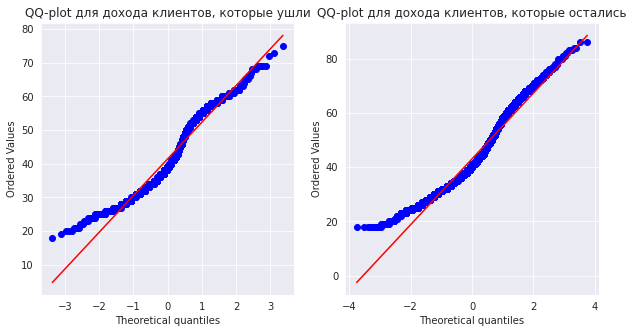

In [50]:
# Разделение данных
left = df[df['churn'] == 1]['age']
stayed = df[df['churn'] == 0]['age']

# Проверка на нормальность с помощью QQ-plot
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
st.probplot(left, dist="norm", plot=plt)
plt.title('QQ-plot для дохода клиентов, которые ушли')

plt.subplot(1, 2, 2)
st.probplot(stayed, dist="norm", plot=plt)
plt.title('QQ-plot для дохода клиентов, которые остались')
plt.show()

По QQ графику видим, что данные распределены близко к нормальному.

Для дальнейшей работы выясним равны ли дисперсии зарплат ушедших и оставшихся клиентов. Для этого проведем тест Левене. 

In [51]:
# Тест Левене (проверка равенства дисперсий):
l_stat, l_p_val = st.levene(left, stayed)

print(f'\nРезультат теста Левене:\nСтатистика: {round(l_stat, 2)}, p-value: {l_p_val}')
if l_p_val < 0.05:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")


Результат теста Левене:
Статистика: 5.82, p-value: 0.015851955302493944
Дисперсии не равны


Дисперсии выборок не равны, при проведении t-теста укажем это в параметре equal_var.

In [52]:
# T-тест Стьюдента
t_stat, t_p_val = st.ttest_ind(left, stayed, equal_var = False)
print(f'Результаты t-теста Стьюдента:\nСтатистика: {round(t_stat, 2)}, p-value: {t_p_val}')
if t_p_val < 0.05:
    print("Отвергаем нулевую гипотезу для t-теста Стьюдента")
else:
    print("Не можем отвергнуть нулевую гипотезу для t-теста Стьюдента")

# U-тест Манна-Уитни
u_stat, u_p_val = st.mannwhitneyu(left, stayed)
print(f'\nРезультаты U-теста Манна-Уитни:\nСтатистика: {round(u_stat, 2)}, p-value: {u_p_val}')
if u_p_val < 0.05:
    print("Отвергаем нулевую гипотезу для U-теста Манна-Уитни")
else:
    print("Не можем отвергнуть нулевую гипотезу для U-теста Манна-Уитни")

Результаты t-теста Стьюдента:
Статистика: -5.39, p-value: 7.536127357312234e-08
Отвергаем нулевую гипотезу для t-теста Стьюдента

Результаты U-теста Манна-Уитни:
Статистика: 6900079.0, p-value: 3.811912767980522e-06
Отвергаем нулевую гипотезу для U-теста Манна-Уитни


<b>Вывод</b>

По результатам как t-теста Стьюдента, так и U-теста Манна-Уитни, мы отвергаем нулевую гипотезу. Это означает, что у нас есть достаточные доказательста для утверждения, что есть статистические значимые различия в среднем возрасте ушедших и оставшихся клиентов.

Наш p-value меньше общепринятого порогового значения 0.05, что указывает на то, что вероятность получить такие или еще более выраженные различия при верности нулевой гипотезы достаточно низка. 

Результат тестов так же подтверждает наши исследования. \
В связи с этим, мы можем утверждать, что средний возраст клиента влияет на его решение об уходе из банка. Это важная информация для банка, поскольку она позволяет пересмотреть стратегию удержания клиентов, учитывая результат тестов.

### Составление портретов уходящих клиентов и сегиентация пользователей.

По итогам анализа можно выделить следующие портреты отточных пользователей:

#### ПОРТРЕТ (сегмент) 1 

Пол: любой \
Возраст: любой \
Город: любой \
Количество используемых продуктов: 4-5 \
Количество баллов собственности: неважно \
Скоринговый рейтинг: неважно\
Баланс: меньше 2 000 000  \
Наличие кредитной карты: неважно \
Пользовательская активность: неважно

In [53]:
portrait_1 = df.query('products >= 4  and balance < 2000000 ')
segment_1 =  df.query('products >= 4  and balance < 2000000 and churn==1')

print ('Общее число пользователей в сегменте №1:', portrait_1['user_id'].count())
print ('Число отточных пользователей в сегменте №1:', segment_1['user_id'].count())
print ('Доля отточных пользователей в сегменте №1:', (segment_1['user_id'].count()  / portrait_1['user_id'].count() * 100).round(1))

display(portrait_1.head(10))

Общее число пользователей в сегменте №1: 416
Число отточных пользователей в сегменте №1: 245
Доля отточных пользователей в сегменте №1: 58.9


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,female,male,category_age,18_24,25_46,47_62,63_+,vip_balance,vip_salary,vip
76,213688,922.0,Ярославль,Ж,37.0,5,1214707.38,4,0,1,...,1,0,25-46,0,1,0,0,0,0,0
81,223978,850.0,Рыбинск,М,34.0,5,351583.16,4,0,1,...,0,1,25-46,0,1,0,0,0,0,0
94,191870,821.0,Ростов,Ж,30.0,3,157677.78,4,0,1,...,1,0,25-46,0,1,0,0,0,0,0
103,128618,841.0,Ростов,М,29.0,1,175505.11,4,1,1,...,0,1,25-46,0,1,0,0,0,0,0
148,122769,868.0,Ростов,Ж,58.0,5,1334745.59,4,0,1,...,1,0,47-62,0,0,1,0,0,0,0
160,171716,908.0,Рыбинск,М,30.0,3,245237.57,4,1,1,...,0,1,25-46,0,1,0,0,0,0,0
172,191272,906.0,Ярославль,Ж,32.0,4,895645.72,4,0,1,...,1,0,25-46,0,1,0,0,0,0,0
183,164652,880.0,Ярославль,Ж,35.0,5,777716.01,4,0,1,...,1,0,25-46,0,1,0,0,0,0,0
203,189519,885.0,Рыбинск,М,62.0,7,617358.97,4,0,1,...,0,1,47-62,0,0,1,0,0,0,0
208,214357,819.0,Ярославль,М,34.0,3,1228101.55,4,1,1,...,0,1,25-46,0,1,0,0,0,0,0


#### ПОРТРЕТ  (сегмент) 2

Пол: мужской \
Возраст: 18-62 \
Город: любой \
Количество используемых продуктов: 1-3 \
Оценка объектов собственности: наличие обственности \
Скоринговый рейтинг: 810 выше \
Баланс: меньше 2 000 000  \
Наличие кредитной карты: да \
Пользовательская активность: да 

In [54]:
portrait_2 = df.query('1 <= products < 4  and male==1 and equity!=0 and score >= 810 and last_activity==1 and credit_card==1 and age <= 62 and balance < 2000000')
segment_2  = df.query('1 <= products < 4  and male==1 and equity!=0 and score >= 810 and last_activity==1 and credit_card==1 and balance < 2000000 and age <= 62 and churn==1')

print ('Общее число пользователей в сегменте №2:', portrait_2['user_id'].count())
print ('Число отточных пользователей в сегменте №2:', segment_2['user_id'].count())
print ('Доля отточных пользователей в сегменте №2:', (segment_2['user_id'].count()  / portrait_2['user_id'].count() * 100).round(1))

display(portrait_2.head(10))


Общее число пользователей в сегменте №2: 565
Число отточных пользователей в сегменте №2: 248
Доля отточных пользователей в сегменте №2: 43.9


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,female,male,category_age,18_24,25_46,47_62,63_+,vip_balance,vip_salary,vip
14,172138,815.0,Ярославль,М,35.0,5,547499.87,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
16,123335,829.0,Ярославль,М,45.0,5,507842.84,1,1,1,...,0,1,25-46,0,1,0,0,0,0,0
36,199614,822.0,Ярославль,М,60.0,5,1472483.77,1,1,1,...,0,1,47-62,0,0,1,0,0,0,0
45,118849,826.0,Ярославль,М,31.0,4,333330.99,1,1,1,...,0,1,25-46,0,1,0,0,0,0,0
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
73,155403,859.0,Рыбинск,М,56.0,5,652553.80,2,1,1,...,0,1,47-62,0,0,1,0,0,0,0
87,124493,816.0,Рыбинск,М,41.0,1,231972.86,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
88,210088,894.0,Ярославль,М,29.0,3,786911.18,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
106,212071,923.0,Ярославль,М,26.0,4,1262394.10,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
135,133932,810.0,Ярославль,М,36.0,2,147589.91,1,1,1,...,0,1,25-46,0,1,0,0,0,0,0


#### ПОРТРЕТ  (сегмент) 3

Пол: мужской \
Возраст: любой \
Город: любой \
Количество используемых продуктов: неважно \
Оценка объектов собственности: наличие собственности \
Скоринговый рейтинг: 810 и выше \
Баланс: меньше 2 000 000  \
Наличие кредитной карты: нет \
Пользовательская активность: неважно

In [55]:
portrait_3 = df.query('male==1 and credit_card==0  and score >= 810 and equity!=0 and balance < 2000000')
segment_3  = df.query('male==1 and credit_card==0 and score >= 810 and equity!=0and balance < 2000000and churn==1')

print ('Общее число пользователей в сегменте №3:', portrait_3['user_id'].count())
print ('Число отточных пользователей в сегменте №3:', segment_3['user_id'].count())
print ('Доля отточных пользователей в сегменте №3:', (segment_3['user_id'].count()  / portrait_3['user_id'].count() * 100).round(1))

display(portrait_3.head(10))

Общее число пользователей в сегменте №3: 687
Число отточных пользователей в сегменте №3: 327
Доля отточных пользователей в сегменте №3: 47.6


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,female,male,category_age,18_24,25_46,47_62,63_+,vip_balance,vip_salary,vip
35,221927,863.0,Ростов,М,39.0,5,1461423.33,1,0,1,...,0,1,25-46,0,1,0,0,0,0,0
40,129705,811.0,Рыбинск,М,34.0,2,129799.35,1,0,0,...,0,1,25-46,0,1,0,0,0,0,0
72,156677,873.0,Ярославль,М,39.0,5,915959.85,3,0,1,...,0,1,25-46,0,1,0,0,0,0,0
81,223978,850.0,Рыбинск,М,34.0,5,351583.16,4,0,1,...,0,1,25-46,0,1,0,0,0,0,0
95,172823,855.0,Ярославль,М,41.0,1,312743.28,3,0,0,...,0,1,25-46,0,1,0,0,0,0,0
116,162149,821.0,Ростов,М,33.0,3,399260.84,2,0,0,...,0,1,25-46,0,1,0,0,0,0,0
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,...,0,1,25-46,0,1,0,0,0,0,0
166,117671,853.0,Ростов,М,28.0,5,315741.45,2,0,1,...,0,1,25-46,0,1,0,0,0,0,0
185,117718,916.0,Ярославль,М,32.0,6,601574.18,2,0,1,...,0,1,25-46,0,1,0,0,0,0,0
190,156786,918.0,Рыбинск,М,34.0,5,444667.15,2,0,0,...,0,1,25-46,0,1,0,0,0,0,0


#### ПОРТРЕТ (сегмент) 4

Пол: любой \
Возраст: 18-62 \
Город: любой \
Количество используемых продуктов: неважно \
Оценка объектов собственности: неважно \
Скоринговый рейтинг: неважно \
Зарплата: 100 000 -200 000
Баланс: 1 000 000 - 2 000 000                        
Наличие кредитной карты: неважно \
Пользовательская активность: да

In [56]:
portrait_4 = df.query('2000000 >= balance >= 1000000 and age <= 62 and last_activity==1 and 110000 <= est_salary <= 220000')
segment_4  = df.query('2000000 >= balance >= 1000000 and age <= 62 and last_activity==1 and 110000 <= est_salary <= 220000 and churn==1')

print ('Общее число пользователей в сегменте №4:', portrait_4['user_id'].count())
print ('Число отточных пользователей в сегменте №4:', segment_4['user_id'].count())
print ('Доля отточных пользователей в сегменте №4:', (segment_4['user_id'].count()  / portrait_4['user_id'].count() * 100).round(1))

display(portrait_4.head(10))

Общее число пользователей в сегменте №4: 392
Число отточных пользователей в сегменте №4: 241
Доля отточных пользователей в сегменте №4: 61.5


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,female,male,category_age,18_24,25_46,47_62,63_+,vip_balance,vip_salary,vip
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
82,155573,893.0,Рыбинск,Ж,48.0,5,1156992.03,1,1,1,...,1,0,47-62,0,0,1,0,0,0,0
106,212071,923.0,Ярославль,М,26.0,4,1262394.10,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
122,201526,894.0,Ярославль,Ж,32.0,4,1319552.08,2,0,1,...,1,0,25-46,0,1,0,0,0,0,0
153,218828,863.0,Ярославль,М,32.0,4,1368110.09,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
156,145747,850.0,Рыбинск,Ж,39.0,3,1060098.78,2,0,1,...,1,0,25-46,0,1,0,0,0,0,0
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
191,156386,880.0,Рыбинск,Ж,51.0,5,1344096.70,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
193,136849,819.0,Ярославль,М,53.0,2,1138881.37,2,1,1,...,0,1,47-62,0,0,1,0,0,0,0
208,214357,819.0,Ярославль,М,34.0,3,1228101.55,4,1,1,...,0,1,25-46,0,1,0,0,0,0,0


#### ПОРТРЕТ (сегмент) 5

Пол: любой \
Возраст: 26-62 \
Город: любой \
Количество используемых продуктов: неважно \
Оценка объектов собственности: неважно \
Скоринговый рейтинг: неважно \
Баланс: больше 2 000 000                        
Наличие кредитной карты: неважно \
Пользовательская активность: неважно

In [57]:
portrait_5 = df.query('balance > 2000000 and 63 > age >25 ')
segment_5  = df.query('balance > 2000000 and 63 > age >25 and churn==1')
print ('Общее число пользователей в сегменте №5:', portrait_5['user_id'].count())
print ('Число отточных пользователей в сегменте №5:', segment_5['user_id'].count())
print ('Доля отточных пользователей в сегменте №5:', (segment_5['user_id'].count()  / portrait_5['user_id'].count() * 100).round(1))

display(portrait_4.head(10))

Общее число пользователей в сегменте №5: 395
Число отточных пользователей в сегменте №5: 207
Доля отточных пользователей в сегменте №5: 52.4


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,female,male,category_age,18_24,25_46,47_62,63_+,vip_balance,vip_salary,vip
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
82,155573,893.0,Рыбинск,Ж,48.0,5,1156992.03,1,1,1,...,1,0,47-62,0,0,1,0,0,0,0
106,212071,923.0,Ярославль,М,26.0,4,1262394.10,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
122,201526,894.0,Ярославль,Ж,32.0,4,1319552.08,2,0,1,...,1,0,25-46,0,1,0,0,0,0,0
153,218828,863.0,Ярославль,М,32.0,4,1368110.09,2,1,1,...,0,1,25-46,0,1,0,0,0,0,0
156,145747,850.0,Рыбинск,Ж,39.0,3,1060098.78,2,0,1,...,1,0,25-46,0,1,0,0,0,0,0
161,197364,928.0,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
191,156386,880.0,Рыбинск,Ж,51.0,5,1344096.70,2,0,1,...,1,0,47-62,0,0,1,0,0,0,0
193,136849,819.0,Ярославль,М,53.0,2,1138881.37,2,1,1,...,0,1,47-62,0,0,1,0,0,0,0
208,214357,819.0,Ярославль,М,34.0,3,1228101.55,4,1,1,...,0,1,25-46,0,1,0,0,0,0,0


#### Приоритизация сегментов:

Приоритизацию проведем проведем в порядке убывания доли отточных клиентов:

+ 1. Сегмент 4 - 61.5% отток, 241  клиент отточный из 395;


+ 2. Сегмент 1 - 58.9% отток, 245 клиент отточный из 416;


+ 3. Сегмент 5 - 52.4% отток, 207 клиентов отточных из 395 ;


+ 4. Сегмент 3 - 47.6% отток, 327 клиентов отточных из 687;


+ 5. Сегмент 2 - 43.9% отток, 248 клиентов отточных из 565.

### Итоговый вывод и рекомендации по сегментам:

1. Проведенное исследование показало, что между оттоком клиентов и некоторыми параметрами существует устойчивая корреляция, тогда как другие параметры практически не влияют на отток.

+ Всего отточных клиентов 1818 это 18.23% от общего количества 9973;

К параметрам, влияющим на отток, относятся:

+ <b>количество продуктов клиента</b>: клиенты, использующие 4-5 продуктов уходят более чем в 2 раза чаще, чем в среднем по банку - 63 и 42% отток; 
 
 
+ <b>оценка объектов собственности клиента</b>: чем больше у клиентов собственности, тем чаще они уходят. Причем у клиентов с 3 и более объектами уровень оттока превышает среднебанковский;


+ <b>пол клиента</b>: мужчины уходят из банка гораздо чаще женщин 23% отточности против 13%;


+ <b>наличие кредитной карты</b>: отсутствие кредитной карты сильно повышает риск ухода клиента из банка. У клиентов не имеющих кредитной карты отток 25% и превышает средний отток по банку;


+ <b>баланс клиента</b>: более половины клиентов с балансом превышающим 660 000 рублей уходит;


+ <b>зарплата</b>: клиенты с зарплатой 100 000 - 220 000 рублей уходят чаще чем остаются;


+ <b>активность клиента</b>: более активные клиенты покидают банк чаще, чем менее активные - 24% отточность;


+ <b>скоринговый рейтинг клиента</b>: клиенты с рейтингом 825-920 баллов чаще уходят, чем остаются;


+ <b>возраст клиента</b>: доля отточных клиентов в возрастных группах 25-35 лет и 50-60 лет превышает долю неотточных;


+ <b>географическое положение</b>: уровень оттока не зависит от города клиентов.




2. Был проведен статистический анализ следующих гипотез:

+ Гипотеза №1 о равенстве доходов оставшихся и отточных клиентов: не подтвердилась
+ Гипотеза №2 о равенстве среднего возраста ушедших и оставшихся клиентов: не подтвердилась


3. Были выделены и приоритизированы 5 сегментов, в наибольшей степени подверженных оттоку (от 44 до 59% отточных клиентов)

### Рекомендации для отдела маркетинга:

1. <b>Сегмент №4</b> - более 61.5% отточных клиентов \
Пол: мужской \
Возраст: любой \
Город: любой \
Количество используемых продуктов: неважно \
Оценка объектов собственности: наличие собственности \
Скоринговый рейтинг: 810 и выше \
Зарплата: 100 000 - 200 000
Баланс: меньше 2 000 000  \
Наличие кредитной карты: нет \
Пользовательская активность: неважно

Рекомендации:
+ информировать о банковских продуктах;
+ предложить кредитную карту;
+ предложить зарплатный проект;
+ предложить кредит (к примеру на автомобиль);
+ предложить страхование собственности.

2. <b>Сегмент №1</b> - более 58.9% отточных клиентов \
Пол: любой \
Возраст: любой \
Город: любой \
Количество используемых продуктов: 4-5 \
Количество баллов собственности: неважно \
Скоринговый рейтинг: неважно\
Баланс: меньше 2 000 000  \
Наличие кредитной карты: неважно \
Пользовательская активность: неважно


Рекомендации:

Клиенты пользуются многими продуктами банка, но что то их не устраивает, поэтому для их удержаниия предлагются следующие меры:

+ информировать  о новых банковских продуктах;
+ предложить льготные условия по существующим продуктам;




3. <b>Сегмент №5</b> - более 52.4% отточных клиентов \
Пол: любой \
Возраст: 26-62 \
Город: любой \
Количество используемых продуктов: неважно \
Оценка объектов собственности: неважно \
Скоринговый рейтинг: неважно \
Баланс: больше 2 000 000                        
Наличие кредитной карты: неважно \
Пользовательская активность: неважно 

Рекомендации:

Данная группа клиентов относится к премиум сегменту, рекомендуется:
+ информировать банковских продуктах;
+ предложить открыть депозит;
+ предложить инвестиционные проекты;
+ предложить страхование по обектам недвижимости; 
+ предложить ипотеку;
+ предложить кредит.



4. <b>Сегмент №3</b> - более 47.6% отточных клиентов \
Пол: любой \
Возраст: 18-62 \
Город: любой \
Количество используемых продуктов: неважно \
Оценка объектов собственности: неважно \
Скоринговый рейтинг: неважно \
Баланс: 1 000 000 - 2 000 000                        
Наличие кредитной карты: неважно \
Пользовательская активность: да

Рекомендации:

Это довольно обеспеченные клиенты, причем проявляющие активность, рекомендуется:
+ информировать банковских продуктах;
+ предложить открыть депозит;
+ предложить инвестиционные проекты;
+ предложить страхование по обектам недвижимости; 
+ предложить ипотеку;
+ предложить кредит.




5. <b>Сегмент №2</b> - более 43.9% отточных клиентов 

Пол: мужской \
Возраст: 18-62 \
Город: любой \
Количество используемых продуктов: 1-3 \
Оценка объектов собственности: наличие обственности \
Скоринговый рейтинг: 810 выше \
Баланс: меньше 2 000 000 \
Наличие кредитной карты: да \
Пользовательская активность: да 

Рекомендации:

К данной группе относятся мужчины, активно пользующимися услугами банка. Уход скорее всего связан с переходом в другой банк.

+ информировать  о новых банковских продуктах;
+ предложить льготные условия по существующим продуктам;
+ предложить страхование по обектам недвижимости;
+ предложить кредит
+ предложить открыть депозит;
+ сформировать пакет улсуг на долгосрочную сотрудничесиво. 